In [3]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install seaborn

  Using cached pandas-1.2.5-cp39-cp39-macosx_10_9_x86_64.whl (10.7 MB)
  Using cached numpy-1.21.0-cp39-cp39-macosx_10_9_x86_64.whl (16.9 MB)
You should consider upgrading via the '/Users/yarkoni/projects/ds-churn/venv/bin/python3 -m pip install --upgrade pip' command.


# Dataset used
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("churn.csv")
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [2]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5939-XAIXZ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

<AxesSubplot:>

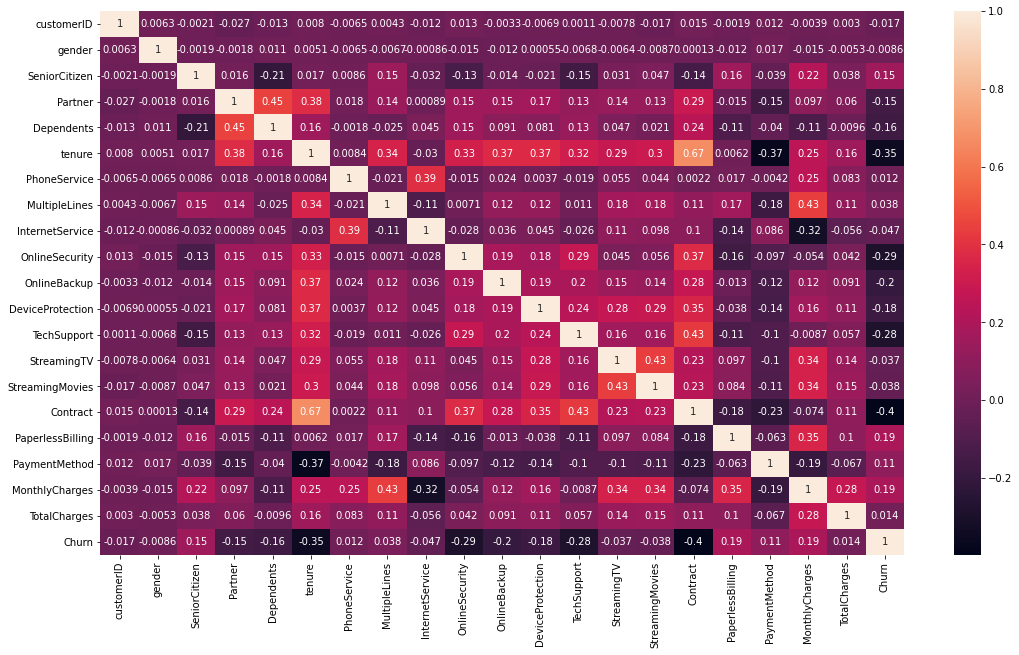

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))

sns.heatmap(df.corr(), annot =True) 

In [7]:
df.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
customerID          0.017447
TotalCharges        0.014479
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

In [8]:
X = df[['Contract', 'tenure', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents', 'OnlineBackup', 'SeniorCitizen', 'MonthlyCharges',
       'PaymentMethod', 'Partner', 'PhoneService']] #taking only relevant columns
y = df['Churn']


# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression
linearreg = LogisticRegression()
linearreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
print(linearreg.score(X_test, y_test))

0.8050165641268339


In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [13]:
print(gnb.score(X_test, y_test))

0.7543776620918126


In [14]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
print(dec_tree.score(X_test, y_test))


0.7179365830572646


In [16]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
print(svc.score(X_test, y_test))

0.8069096071935636
